In [ ]:
import numpy as np
import keras

import os
import cv2
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

import time
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt 
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path= '/content/drive/MyDrive/3DV-eye/train'
valid_path= '/content/drive/MyDrive/3DV-eye/valid'
batch_size=32
train_batches =ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),batch_size=batch_size)
valid_batches =ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),batch_size=batch_size)

Found 655 images belonging to 3 classes.
Found 189 images belonging to 3 classes.


In [ ]:
steps_train = train_batches.n / batch_size
steps_train


20.46875

In [ ]:
steps_valid = valid_batches.n / batch_size
steps_valid


5.90625

In [ ]:
num_classes = train_batches.num_classes
num_classes

3

In [ ]:
cls_train = train_batches.classes
cls_test =  valid_batches.classes
class_names = list(train_batches.class_indices.keys())
class_names

['-10V_eyes', '0V_eyes', '10V_eyes']

In [ ]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]
image_paths_train = path_join(train_path, train_batches.filenames)
image_paths_test = path_join(valid_path, valid_batches.filenames)

def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]
                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]
    # Convert to a numpy array and return it.
    return np.asarray(images)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


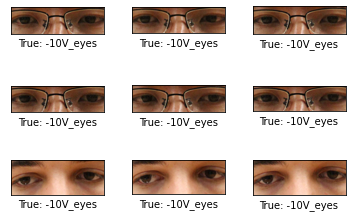

In [ ]:
# Load the first images from the train-set.
images = load_images(image_paths=image_paths_train[0:9])
# Get the true classes for those images.
cls_true = cls_train[0:9]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [ ]:
datagen.flow_from_directory(train_path,
                            (featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, 
                             width_shift_range=0.2,height_shift_range=0.2,
                             horizontal_flip=False)
datagen.fit(train_path)

SyntaxError: ignored

In [ ]:
#Data Preprocessing and Data Augmentation
from keras import backend as K
img_width, img_height = 224, 224
#num_classes= 3
#epochs = 10
#batch_size = 32
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
datagen = ImageDataGenerator(rescale=1./255,
                             
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             fill_mode='nearest',
                             validation_split=0.2)  




train_data = datagen.flow_from_directory(train_path, 
                                               target_size=(224, 224), 
                                               color_mode='rgb',
                                               batch_size=batch_size, 
                                               class_mode='categorical',
                                               shuffle=True,          
                                               subset = 'training') 

val_data = datagen.flow_from_directory(train_path, 
                                           target_size=(224, 224), 
                                           color_mode='rgb',
                                           batch_size=batch_size, 
                                           class_mode='categorical',
                                           shuffle=True,
                                           subset = 'validation')

num_train = train_data.n
num_val = val_data.n
print(num_train)
print(num_val)

Found 525 images belonging to 3 classes.
Found 130 images belonging to 3 classes.
525
130


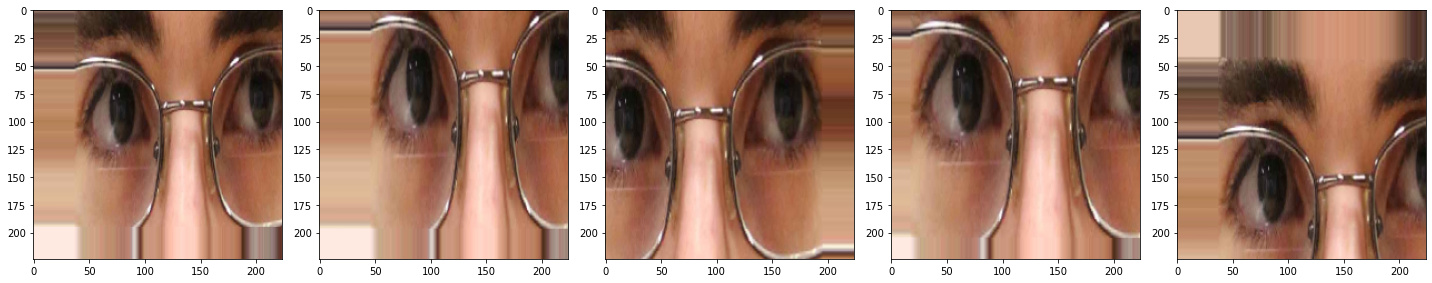

In [ ]:
#Augmented Images Visualization

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
augmented_images = [train_data[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras
from glob import glob
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input, Dense, Flatten
input_shape = (224, 224, 3)
InceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in InceptionV3.layers:
  layer.trainable= False
folders= glob('/content/drive/MyDrive/3DV-eye/train/*')
x=Flatten()(InceptionV3.output)
prediction= Dense(len(folders), activation='softmax')(x)
model= Model(inputs= InceptionV3.input, outputs= prediction)
model.summary()
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])


87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs=10
#compile the model
#model.compile(Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit_generator(generator=train_batches,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=valid_batches,
                                  validation_steps=steps_valid)
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))
result = model.evaluate_generator(valid_batches, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 531s 24s/step - loss: 327.8587 - acc: 0.3603 - val_loss: 168.2520 - val_acc: 0.4656
Epoch 2/10
20/20 [==============================] - 8s 382ms/step - loss: 173.6243 - acc: 0.4260 - val_loss: 274.8801 - val_acc: 0.4392
Epoch 3/10
20/20 [==============================] - 8s 372ms/step - loss: 162.5844 - acc: 0.4718 - val_loss: 160.1628 - val_acc: 0.3228
Epoch 4/10
20/20 [==============================] - 8s 374ms/step - loss: 137.0457 - acc: 0.4794 - val_loss: 170.2260 - val_acc: 0.3810
Epoch 5/10
20/20 [==============================] - 8s 374ms/step - loss: 153.7259 - acc: 0.5191 - val_loss: 256.1707 - val_acc: 0.4339
Epoch 6/10
20/20 [==============================] - 8s 372ms/step - loss: 180.1019 - acc: 0.4534 - val_loss: 194.8972 - val_acc: 0.4233
Epoch 7/10
20/20 [==============================] - 8s 373ms/step - loss: 125.4142 - acc: 0.5069 - val_loss: 185.6735 - val_acc: 0.3545
Epoch 8/10
20/20 [==============================

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test-set classification accuracy: 62.50%


In [ ]:
epochs=20
#compile the model
#model.compile(Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit_generator(generator=train_batches,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=valid_batches,
                                  validation_steps=steps_valid)
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))
result = model.evaluate_generator(valid_batches, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 393s 18s/step - loss: 332.5251 - acc: 0.3542 - val_loss: 425.0595 - val_acc: 0.3175
Epoch 2/20
20/20 [==============================] - 8s 377ms/step - loss: 199.4959 - acc: 0.4092 - val_loss: 159.1566 - val_acc: 0.5238
Epoch 3/20
20/20 [==============================] - 8s 368ms/step - loss: 166.7110 - acc: 0.4473 - val_loss: 155.2602 - val_acc: 0.3333
Epoch 4/20
20/20 [==============================] - 8s 365ms/step - loss: 136.0130 - acc: 0.5191 - val_loss: 92.8057 - val_acc: 0.6032
Epoch 5/20
20/20 [==============================] - 7s 365ms/step - loss: 159.7147 - acc: 0.4885 - val_loss: 188.6842 - val_acc: 0.5926
Epoch 6/20
20/20 [==============================] - 7s 364ms/step - loss: 123.3340 - acc: 0.5450 - val_loss: 69.8431 - val_acc: 0.6402
Epoch 7/20
20/20 [==============================] - 7s 364ms/step - loss: 139.4988 - acc: 0.5221 - val_loss: 38.0572 - val_acc: 0.5503
Epoch 8/20
20/20 [==============================] -

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test-set classification accuracy: 71.88%


In [ ]:
epochs=50
#compile the model
#model.compile(Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit_generator(generator=train_batches,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=valid_batches,
                                  validation_steps=steps_valid)
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))
result = model.evaluate_generator(valid_batches, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 180s 9s/step - loss: 349.1894 - acc: 0.3649 - val_loss: 283.5559 - val_acc: 0.3175
Epoch 2/50
20/20 [==============================] - 90s 4s/step - loss: 207.5641 - acc: 0.4198 - val_loss: 81.9209 - val_acc: 0.5820
Epoch 3/50
20/20 [==============================] - 89s 4s/step - loss: 166.6670 - acc: 0.4366 - val_loss: 200.4291 - val_acc: 0.4021
Epoch 4/50
20/20 [==============================] - 89s 4s/step - loss: 148.1273 - acc: 0.4901 - val_loss: 216.0667 - val_acc: 0.5714
Epoch 5/50
20/20 [==============================] - 89s 4s/step - loss: 135.3829 - acc: 0.5450 - val_loss: 159.0320 - val_acc: 0.6296
Epoch 6/50
20/20 [==============================] - 89s 4s/step - loss: 145.7101 - acc: 0.5221 - val_loss: 53.7659 - val_acc: 0.6614
Epoch 7/50
20/20 [==============================] - 89s 4s/step - loss: 140.0829 - acc: 0.5313 - val_loss: 44.1005 - val_acc: 0.5661
Epoch 8/50
20/20 [==============================] - 89s 4s/step 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test-set classification accuracy: 78.12%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


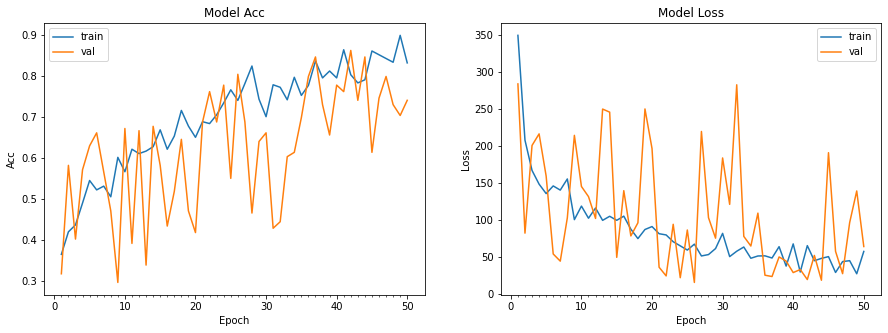

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Acc')
    axs[0].set_ylabel('Acc')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

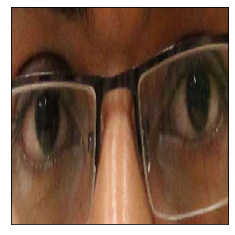

	-10V_eyes ==> 0.00 %
	0V_eyes ==> 0.00 %
	10V_eyes ==> 100.00 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/3DV-eye/test/0011_2m_0P_10V_5H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1

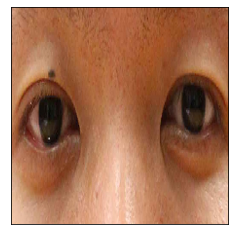

	-10V_eyes ==> 100.00 %
	0V_eyes ==> 0.00 %
	10V_eyes ==> 0.00 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/3DV-eye/test/0015_2m_0P_-10V_0H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1